In [1]:

#Install what is needed
!pip install pandas numpy matplotlib xarray hvplot
!pip install rasterio
!pip install rioxarray
!pip install fiona 
!pip install geopandas
!pip install cartopy
!pip install geopandas hvplot geoviews
!pip install netCDF4
!pip install pydap
!pip install pygbif
!pip install osmnx



import fiona



from math import floor, ceil
import os
import pathlib
import geopandas as gpd
from shapely.geometry import box
import hvplot.xarray  # for plotting
import rioxarray  # required for .rio
import xarray as xr
import pathlib
import requests
import zipfile
import geopandas as gpd 
import hvplot.pandas  # for interactive plotting
#Import from above
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import netCDF4
from osmnx import features as osm

import matplotlib.pyplot as plt

import geopandas as gpd
import cartopy.crs as ccrsp

!pip install earthaccess

import earthaccess

from glob import glob

e
import pandas as pd
import numpy as np
import xarray as xr
import rioxarray as rxr
from rioxarray.merge import merge_arrays

import hvplot.pandas
import hvplot.xarray

from pygbif import occurrences
from shapely.geometry import Point
 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 186.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 256.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 180.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 143.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 159.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 46.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 143.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 127.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 167.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 164.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.12.0
    Uninstalling fsspec-2024.12.0:
      Successfully uninstalled fsspec-2024.12.0


In [2]:
iplant_user = os.environ['IPLANT_USER']
data_path = (
    pathlib.Path.home()
    / 'data-store' / 'home' / iplant_user / 'habitat_suitability')

data_path.mkdir(parents = True, exist_ok = True)

data_path

PosixPath('/home/jovyan/data-store/home/elemilene01/habitat_suitability')

In [3]:
!pip install pygbif
# Define and create the project data directory
habitat_suitability_data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'habitat_suitability'
)
os.makedirs(habitat_suitability_data_dir, exist_ok=True)

# Call the data directory to check its location
habitat_suitability_data_dir

from pygbif import occurrences
import os
import pathlib

# Define correct project directory path
project_data_dir = os.path.join(
    pathlib.Path.home(),
    'Rocky_Mountain_Juniper_Study',
    'data',
    'habitat_suitability'
)
os.makedirs(project_data_dir, exist_ok=True)

print("Data directory is:", project_data_dir)

# Define WKT bounding box for ROMO area
bbox = "POLYGON((-105.9 40.1, -105.4 40.1, -105.4 40.6, -105.9 40.6, -105.9 40.1))"

# Query GBIF for Juniperus scopulorum
records = occurrences.search(
    scientificName="Juniperus scopulorum",
    hasCoordinate=True,
    limit=1000,
    geometry=bbox
)

# Preview first few results
for rec in records['results'][:5]:
    print(rec.get('species'), rec.get('decimalLatitude'), rec.get('decimalLongitude'))


Data directory is: /home/jovyan/Rocky_Mountain_Juniper_Study/data/habitat_suitability
Juniperus scopulorum 40.377706 -105.542436
Juniperus scopulorum 40.436258 -105.551189
Juniperus scopulorum 40.473475 -105.444317
Juniperus scopulorum 40.472766 -105.443738
Juniperus scopulorum 40.374133 -105.571019


In [4]:
# Search Juniperus scopulorum within bounding box (ROMO)
forest_gdf = osm.features_from_place(
    query = 'Roosevelt National Forest',
    tags = {'name':'Roosevelt National Forest'})

forest_gdf

type        boundary                       name  \
element  id                                                            
relation 395767  boundary  protected_area  Roosevelt National Forest   
         395767  boundary  protected_area  Roosevelt National Forest   
         395767  boundary  protected_area  Roosevelt National Forest   
         395767  boundary  protected_area  Roosevelt National Forest   
         395767  boundary  protected_area  Roosevelt National Forest   
         395767  boundary  protected_area  Roosevelt National Forest   

                                     operator operator:short operator:type  \
element  id                                                                  
relation 395767  United States Forest Service           USFS        public   
         395767  United States Forest Service           USFS        public   
         395767  United States Forest Service           USFS        public   
         395767  United States Forest Service           USFS        public   
         395767  United States Forest Service           USFS        public   
         395767  United States Forest Service           USFS        public   

                operator:wikidata               operator:wikipedia ownership  \
element  id                                                                    
relation 395767          Q1891156  en:United States Forest Service  national   
         395767          Q1891156  en:United States Forest Service  national   
         395767          Q1891156  en:United States Forest Service  national   
         395767          Q1891156  en:United States Forest Service  national   
         395767          Q1891156  en:United States Forest Service  national   
         395767          Q1891156  en:United States Forest Service  national   

                protect_class   protected  protected_area protection_title  \
element  id                                                                  
relation 395767             6  perpetuity  forest_reserve  National Forest   
         395767             6  perpetuity  forest_reserve  National Forest   
         395767             6  perpetuity  forest_reserve  National Forest   
         395767             6  perpetuity  forest_reserve  National Forest   
         395767             6  perpetuity  forest_reserve  National Forest   
         395767             6  perpetuity  forest_reserve  National Forest   

                                     website  wikidata  \
element  id                                              
relation 395767  https://www.fs.usda.gov/arp  Q7366477   
         395767  https://www.fs.usda.gov/arp  Q7366477   
         395767  https://www.fs.usda.gov/arp  Q7366477   
         395767  https://www.fs.usda.gov/arp  Q7366477   
         395767  https://www.fs.usda.gov/arp  Q7366477   
         395767  https://www.fs.usda.gov/arp  Q7366477   

                                    wikipedia  \
element  id                                     
relation 395767  en:Roosevelt National Forest   
         395767  en:Roosevelt National Forest   
         395767  en:Roosevelt National Forest   
         395767  en:Roosevelt National Forest   
         395767  en:Roosevelt National Forest   
         395767  en:Roosevelt National Forest   

                                                          geometry  
element  id                                                         
relation 395767  MULTIPOLYGON (((-106.15924 40.99745, -106.1445...  
         395767  MULTIPOLYGON (((-106.15924 40.99745, -106.1445...  
         395767  MULTIPOLYGON (((-106.15924 40.99745, -106.1445...  
         395767  MULTIPOLYGON (((-106.15924 40.99745, -106.1445...  
         395767  MULTIPOLYGON (((-106.15924 40.99745, -106.1445...  
         395767  MULTIPOLYGON (((-106.15924 40.99745, -106.1445...

In [5]:
forest_gdf = forest_gdf.iloc[[0]]

forest_gdf

,,type,boundary,name,operator,operator:short,operator:type,operator:wikidata,operator:wikipedia,ownership,protect_class,protected,protected_area,protection_title,website,wikidata,wikipedia,geometry
element,id,,,,,,,,,,,,,,,,,
relation,395767,boundary,protected_area,Roosevelt National Forest,United States Forest Service,USFS,public,Q1891156,en:United States Forest Service,national,6,perpetuity,forest_reserve,National Forest,https://www.fs.usda.gov/arp,Q7366477,en:Roosevelt National Forest,"MULTIPOLYGON (((-106.15924 40.99745, -106.1445..."


In [6]:
# Convert GBIF records (list of dicts) to DataFrame
juniper_gdf = gpd.read_file ('Juniper_Occur.zip')

juniper_gdf.eventDate = pd.to_datetime(juniper_gdf.eventDate , format='ISO8601', utc=True)

# Drop rows without lat/lon
juniper_gdf = juniper_gdf.dropna(subset=["decimalLatitude", "decimalLongitude","eventDate"])

juniper_gdf = (
    gpd.GeoDataFrame(
        juniper_gdf, 
        geometry=gpd.points_from_xy(
            juniper_gdf.decimalLongitude, 
            juniper_gdf.decimalLatitude), 
        crs="EPSG:4326")
    # Select the desired columns
    [['eventDate','geometry']]
)
juniper_gdf

,eventDate,geometry
0,2013-11-30 15:15:40+00:00,POINT (-105.37904 39.65909)
1,2011-05-19 00:00:00+00:00,POINT (-103.30006 37.21794)
2,2011-05-19 00:00:00+00:00,POINT (-103.30006 37.21794)
3,2011-05-19 00:00:00+00:00,POINT (-102.98788 37.09172)
4,2008-10-22 00:00:00+00:00,POINT (-105.20178 39.6553)
...,...,...
1692,2017-03-18 10:17:00+00:00,POINT (-105.3013 39.9977)
1693,2003-05-03 00:00:00+00:00,POINT (-103.99388 40.81583)
1694,2003-03-25 00:00:00+00:00,POINT (-104.96555 39.74555)
1695,2003-03-16 00:00:00+00:00,POINT (-105.11111 40.755)


In [7]:
# Ensure both are in EPSG:4326 for web maps
forest_gdf = forest_gdf.to_crs("EPSG:4326")
juniper_gdf = juniper_gdf.to_crs("EPSG:4326")

juniper_occur_gdf = juniper_gdf.sjoin(
    gpd.GeoDataFrame(
        geometry = forest_gdf.envelope),
    predicate = 'within')

juniper_occur_gdf

,eventDate,geometry,element,id
5,2008-10-22 00:00:00+00:00,POINT (-105.30332 40.00425),relation,395767
7,2025-06-16 16:10:27+00:00,POINT (-105.48001 40.7824),relation,395767
12,2025-06-13 20:29:04+00:00,POINT (-105.25949 39.96689),relation,395767
15,2025-06-16 16:10:47+00:00,POINT (-105.47989 40.78238),relation,395767
17,2025-06-16 16:48:39+00:00,POINT (-105.48034 40.78199),relation,395767
...,...,...,...,...
1678,2018-03-25 16:20:00+00:00,POINT (-105.72483 40.70628),relation,395767
1687,2001-08-08 00:00:00+00:00,POINT (-105.43333 40.17528),relation,395767
1691,2017-07-17 11:14:00+00:00,POINT (-105.24091 40.4883),relation,395767
1692,2017-03-18 10:17:00+00:00,POINT (-105.3013 39.9977),relation,395767


In [8]:
# ROMO boundary plot (with basemap set here)
forest_plot = forest_gdf.hvplot(
    geo=True,
    line_color='orange',
    line_width=4,
    alpha=0.7,
    tiles='EsriImagery',  
    frame_width=800,
    frame_height=600,
    title="Juniperus scopulorum in Roosevelt National Forest"
)

# GBIF points 
juniper_plot = juniper_occur_gdf.hvplot.points(
    geo=True,
    color='white',
    size=10,
    alpha=0.6
)

# Combine
forest_plot * juniper_plot

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]

In [9]:
# Prep for downloading SRTM 

# Define and create the project data directory
habitat_suitability_data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'habitat_suitability'
)
os.makedirs(habitat_suitability_data_dir, exist_ok=True)

# Call the data directory to check its location
habitat_suitability_data_dir

# Create data dir 
elevation_dir= os.path.join(habitat_suitability_data_dir, 'srtm')
os.makedirs(elevation_dir, exist_ok=True)

# call the variable to check location
elevation_dir


'/home/jovyan/earth-analytics/data/habitat_suitability/srtm'

In [10]:
# Download Raster data through earthaccess Part 1 of 1
# Login and search earthaccess, download results

# login to earthaccess
earthaccess.login(strategy="interactive", persist=True)

bounds = tuple(forest_gdf.total_bounds)

# Search earthaccess
elevation_results = earthaccess.search_data(
    short_name = "SRTMGL1",
    bounding_box = bounds
)
elevation_results

# Download earthaccess results
srtm_files = earthaccess.download(elevation_results, elevation_dir)

# Return a list of file paths that match the pattern
srtm_files = glob (os.path.join(
    elevation_dir, 
    '*hgt.zip')
)

# Call srtm_file to see it 
srtm_files

Enter your Earthdata Login username:  el3branr0cks
Enter your Earthdata password:  ········


INFO:You're now authenticated with NASA Earthdata Login
INFO:Persisting credentials to /home/jovyan/.netrc
INFO:Granules found: 4
INFO: Getting 4 granules, approx download size: 0.05 GB


QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

['/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N39W107.SRTMGL1.hgt.zip',
 '/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N39W106.SRTMGL1.hgt.zip',
 '/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N40W106.SRTMGL1.hgt.zip',
 '/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N40W107.SRTMGL1.hgt.zip']

In [11]:
print("Number of files:", len(srtm_files))
print("Files:", srtm_files)

Number of files: 4
Files: ['/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N39W107.SRTMGL1.hgt.zip', '/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N39W106.SRTMGL1.hgt.zip', '/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N40W106.SRTMGL1.hgt.zip', '/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N40W107.SRTMGL1.hgt.zip']


In [12]:
# Create list of files for each study area
juniper_srtm_files = list(srtm_files)



# Call list to make sure it's right
juniper_srtm_files

['/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N39W107.SRTMGL1.hgt.zip',
 '/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N39W106.SRTMGL1.hgt.zip',
 '/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N40W106.SRTMGL1.hgt.zip',
 '/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N40W107.SRTMGL1.hgt.zip']

In [13]:
# Create function with description to process srtm raster images
# Part 1 of 1
def process_image_list(url_list, chosen_buffer, bounds_gdf):
    """
    Load, crop, and scale a raster image 

    Parameters
    ----------
    url: file-like or path-like
      File accessor downloaded or obtained 
    chosen_buffer: float number
      Amount of degrees to extend past the bounds of the bounds_gdf 
    bounds_gdf: gpd.GeoDataFrame
      Area of interest to crop to

    Returns
    -------
    merged_da: rxr.DataArray
      Processed raster
    """   
        
    # List to store cropped DataArrays for the current site 
    da_list= []
      
    buffer= chosen_buffer

    for url in url_list:

        # Connect to the raster image
        da = rxr.open_rasterio(
          url, 
          mask_and_scale=True
          ).squeeze()
        
          # Get the study bounds
        bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (
          bounds_gdf
          .to_crs(da.rio.crs)
          .total_bounds 
          )

        # Crop the raster image to the bounds of the study area
        cropped_da = (
          da.rio.clip_box(bounds_min_lon-buffer, bounds_min_lat-buffer, bounds_max_lon+buffer, bounds_max_lat+buffer)
          )
        
        # Append the cropped DataArray to the list
        da_list.append(cropped_da)

    # Merge the cropped DataArrays for this site
    merged_da = (
      merge_arrays(da_list)
      )
        
    return merged_da

In [14]:
# Use process_image_list function on each set of site files 
# save to new variable names to use later

# Use process_image_list function on comanche srtm files
srtm_juniper_result_da = process_image_list(juniper_srtm_files, .025, forest_gdf)


# Create a list to save the site srtm results to
srtm_da_results = [
    srtm_juniper_result_da,
]
srtm_da_results

print("Raster CRS:", srtm_juniper_result_da.rio.crs)
print("GDF CRS:", juniper_occur_gdf.crs)

juniper_occur_gdf = juniper_occur_gdf[juniper_occur_gdf.geometry.notnull() & juniper_occur_gdf.is_valid]
forest_gdf = forest_gdf[forest_gdf.geometry.notnull() & forest_gdf.is_valid]

print("Juniper GDF bounds:", juniper_occur_gdf.total_bounds)
print("RMNP GDF bounds:", forest_gdf.total_bounds)
# Reproject vector to match raster
juniper_occur_gdf = juniper_occur_gdf.to_crs(srtm_juniper_result_da.rio.crs)

Raster CRS: EPSG:4326
GDF CRS: EPSG:4326
Juniper GDF bounds: [-106.15445    39.849905 -105.190508   40.89    ]
RMNP GDF bounds: [-106.195438    39.8470609 -105.1901814   40.997754 ]


In [15]:
forest_gdf

,,type,boundary,name,operator,operator:short,operator:type,operator:wikidata,operator:wikipedia,ownership,protect_class,protected,protected_area,protection_title,website,wikidata,wikipedia,geometry
element,id,,,,,,,,,,,,,,,,,
relation,395767,boundary,protected_area,Roosevelt National Forest,United States Forest Service,USFS,public,Q1891156,en:United States Forest Service,national,6,perpetuity,forest_reserve,National Forest,https://www.fs.usda.gov/arp,Q7366477,en:Roosevelt National Forest,"MULTIPOLYGON (((-106.15924 40.99745, -106.1445..."


/tmp/ipykernel_458/1828257375.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


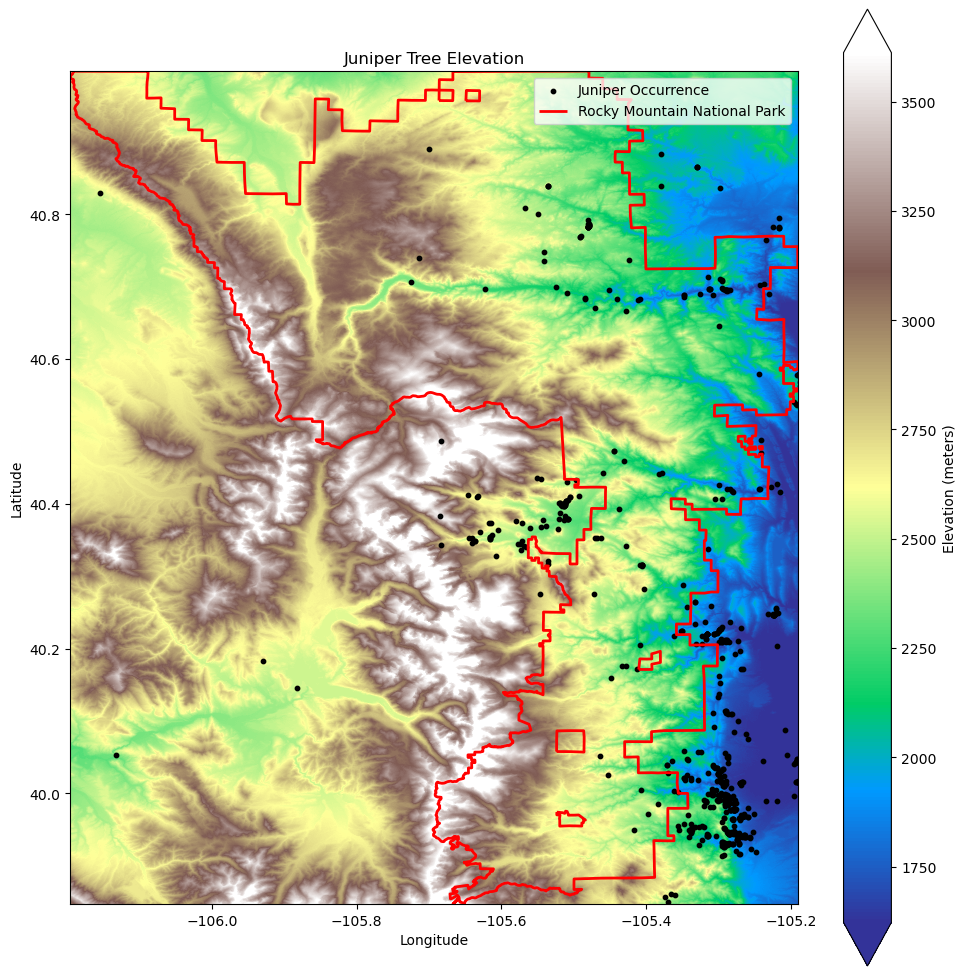

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot raster
srtm_juniper_result_da.plot(
    ax=ax,
    cmap='terrain',
    robust=True,
    cbar_kwargs={"label": "Elevation (meters)"}
)

# Plot juniper occurrences
if juniper_gdf.geometry.iloc[0].geom_type == "Point":
    juniper_gdf.plot(ax=ax, color='black', markersize=10, label='Juniper Occurrence')
else:
    juniper_gdf.boundary.plot(ax=ax, color='black', linewidth=1, label='Juniper Boundary')

# Plot Boulder boundary
forest_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Rocky Mountain National Park')

# Set valid aspect ratio
ax.set_aspect('equal')  
b_box = forest_gdf.total_bounds
ax.set_xlim(b_box[0],b_box[2])
ax.set_ylim(b_box[1],b_box[3])


# Label the axes
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Add title, legend, and formatting
ax.set_title("Juniper Tree Elevation")
ax.legend()

plt.tight_layout()
plt.show()

In [17]:
from pydap.client import open_url

url = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/BNU-ESM/macav2metdata_pr_BNU-ESM_r1i1p1_historical_2000_2004_CONUS_monthly.nc'
dataset = open_url(url)

print(dataset.keys())

/opt/conda/lib/python3.12/site-packages/pydap/handlers/dap.py:134: UserWarning: PyDAP was unable to determine the DAP protocol defaulting to DAP2. DAP2 is consider legacy and may result in slower responses. 
Consider replacing `http` in your `url` with either `dap2` or `dap4` to specify the DAP protocol (e.g. `dap2://<data_url>` or `dap4://<data_url>`).  For more 
information, go to https://www.opendap.org/faq-page.
  warnings.warn(


KeysView(<DatasetType with children 'lat', 'crs', 'lon', 'time', 'precipitation'>)


In [18]:
maca_2000_2006_url = ("http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/BNU-ESM/macav2metdata_pr_BNU-ESM_r1i1p1_rcp45_2006_2010_CONUS_monthly.nc")

maca_2000_2006_ds = xr.open_dataset(maca_2000_2006_url)

print(maca_2000_2006_ds)


<xarray.Dataset> Size: 195MB
Dimensions:        (time: 60, lat: 585, lon: 1386, crs: 1)
Coordinates:
  * lat            (lat) float64 5kB 25.06 25.1 25.15 25.19 ... 49.31 49.35 49.4
  * crs            (crs) int32 4B 1
  * lon            (lon) float64 11kB 235.2 235.3 235.3 ... 292.9 292.9 292.9
  * time           (time) object 480B 2006-01-15 00:00:00 ... 2010-12-15 00:0...
Data variables:
    precipitation  (time, lat, lon) float32 195MB ...
Attributes: (12/46)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  REACCH
    publisher_email:                 reacch@uidaho.edu

In [19]:
lat_bounds = slice(40.4, 40.1)  
lon_bounds = slice(-105.95, -105.5)

subset = maca_2000_2006_ds.sel(lat=slice(40.1, 40.4), lon=slice(255, 255.5))
print(subset)

<xarray.Dataset> Size: 24kB
Dimensions:        (time: 60, lat: 8, lon: 12, crs: 1)
Coordinates:
  * lat            (lat) float64 64B 40.1 40.15 40.19 40.23 ... 40.31 40.35 40.4
  * crs            (crs) int32 4B 1
  * lon            (lon) float64 96B 255.0 255.1 255.1 ... 255.4 255.4 255.5
  * time           (time) object 480B 2006-01-15 00:00:00 ... 2010-12-15 00:0...
Data variables:
    precipitation  (time, lat, lon) float32 23kB ...
Attributes: (12/46)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  REACCH
    publisher_email:                 reacch@uidaho.edu
    pu

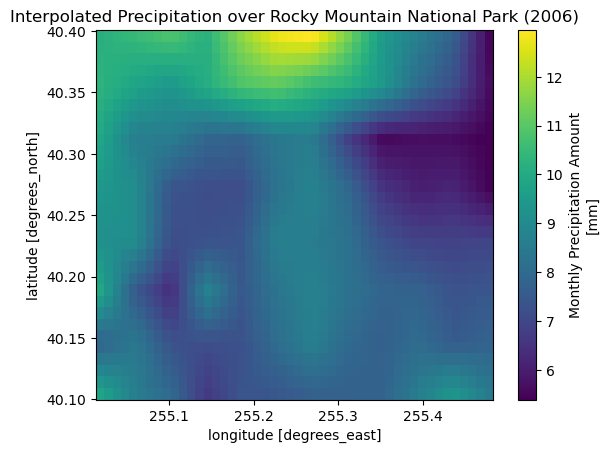

In [20]:
# create precipitation map
lat_min = float(subset.lat.min().values)
lat_max = float(subset.lat.max().values)
lon_min = float(subset.lon.min().values)
lon_max = float(subset.lon.max().values)

subset_fine = subset['precipitation'].isel(time=0).interp(
    lat=np.linspace(lat_min, lat_max, len(subset.lat)*4),
    lon=np.linspace(lon_min, lon_max, len(subset.lon)*4)
)

subset_fine.plot()
plt.title("Interpolated Precipitation over Rocky Mountain National Park (2006)")
plt.show()

:Overlay
   .Image.I    :Image   [lon,lat]   (Monthly Precipitation Amount)
   .Polygons.I :Polygons   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]

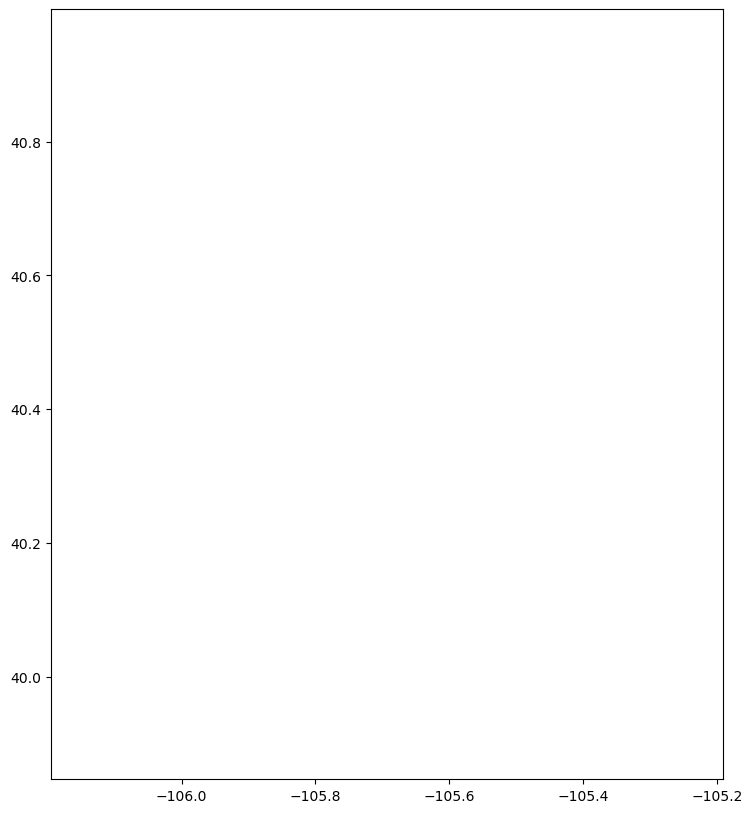

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))

precip_plot = subset_fine.hvplot.image(
     geo=True,
    cmap='Blues',
    alpha=0.6,
    colorbar=True,
    title="Precipitation in Roosevelt National Forest (2006)"
)

forest_plot = forest_gdf.hvplot(
    geo=True,
    color='green',
    alpha=0,
    line_width=2
)

juniper_plot = juniper_gdf.hvplot(
    geo=True,
    kind='points',
    color='black',
    size=5,
    alpha=0.8
)

# Set valid aspect ratio
ax.set_aspect('equal')  
b_box = forest_gdf.total_bounds
ax.set_xlim(b_box[0],b_box[2])
ax.set_ylim(b_box[1],b_box[3])

minx, miny, maxx, maxy = forest_gdf.total_bounds

combined = precip_plot * forest_plot * juniper_plot

combined

In [ ]:
print(subset.dims)

In [ ]:
print("ROMO boundary bounds:", romo_gdf.total_bounds)
print("Juniper points bounds:", gbif_gdf.total_bounds)

In [ ]:

# Load the CSV
df = pd.read_csv("Colorado_NFires.csv")

# Show the first few rows
print(df.head())

In [ ]:
print(df.columns)
print(df.dtypes)

In [ ]:
print(df['geometry'].iloc[0])

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

def parse_r_list_to_polygon(r_str):
    try:
        # Remove 'list(c(' prefix and '))' suffix
        stripped = r_str.replace("list(c(", "").replace("))", "")
        
        # Convert to list of floats
        coords = [float(x.strip()) for x in stripped.split(",")]
        half = len(coords) // 2
        
        # Split into lon/lat
        lons = coords[:half]
        lats = coords[half:]
        
        # Zip into coordinate pairs and create a Polygon
        points = list(zip(lons, lats))
        return Polygon(points)
    except Exception as e:
        print(f"Failed to parse: {r_str[:60]}... → {e}")
        return None

# Load CSV
df = pd.read_csv("Colorado_NFires.csv")

# Apply geometry parsing
df['geometry'] = df['geometry'].apply(parse_r_list_to_polygon)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

In [ ]:
gdf.hvplot(
    geo=True,
    tiles='CartoLight',
    color='per_change',
    cmap='viridis',
    line_width=0.5,
    title='Colorado Fire Area Change'
)

In [ ]:
from shapely.geometry import box

# Create bounding box around the juniper area
romo_bounds = box(-105.91, 40.14, -105.4, 40.57)

# Clip fire data to that region
gdf_clipped = gdf[gdf.geometry.intersects(romo_bounds)]

#Plot all variables
romo_plot = romo_gdf.hvplot(
    geo=True,
    color='darkgreen',
    line_width=2,
    alpha=0.5,
    label='Juniper Polygon'
)

gbif_plot = gbif_gdf.hvplot(
    geo=True,
    color='green',
    size=8,
    kind='points',
    alpha=0.8,
    label='Juniper Occurrences'
)
fire_plot = gdf.hvplot(
    geo=True,
    tiles='CartoLight',
    color='per_change',
    cmap='viridis',
    line_width=0.5,
    title='Colorado Fire Area Change'
)

# Overlay them all
combined = romo_plot * gbif_plot * fire_plot 
combined

In [ ]:
import hvplot.pandas
from shapely.geometry import box
import geopandas as gpd

# Define zoom bounding box from data (or hardcoded)
romo_bounds = box(-105.91, 40.14, -105.4, 40.57)
romo_box = gpd.GeoDataFrame(geometry=[romo_bounds], crs="EPSG:4326")

# Make sure all GeoDataFrames are in the same CRS
gdf = gdf.to_crs("EPSG:4326")
romo_gdf = romo_gdf.to_crs("EPSG:4326")
gbif_gdf = gbif_gdf.to_crs("EPSG:4326")
romo_box = romo_box.to_crs("EPSG:4326")

# Base fire map
fire_map = gdf.hvplot(
    geo=True,
    tiles='OSM',
    color='per_change',
    cmap='viridis',
    line_width=0.5,
    title='Colorado Fire Area Change'
)

# ROMO polygon (juniper habitat)
juniper_poly = romo_gdf.hvplot(
    geo=True,
    color='darkgreen',
    alpha=0,
    line_width=2,
    label='ROMO Polygon'
)

# Juniper GBIF points
juniper_pts = gbif_gdf.hvplot(
    geo=True,
    kind='points',
    color='black',
    size=6,
    alpha=0.7,
    label='Juniper Points'
)

# Bounding box to highlight zoom area
zoom_box = romo_box.hvplot(
    geo=True,
    color='red',
    alpha=0,
    line_width=2,
    line_dash='dashed',
    label='Zoom Box'
)

# Overlay everything
combined = fire_map * juniper_poly * juniper_pts * zoom_box

In [ ]:
print(len(gdf), len(romo_gdf), len(gbif_gdf))

In [ ]:
combined = (
    gdf.hvplot(geo=True, tiles='OSM', color='per_change') *
    romo_gdf.hvplot(geo=True, color='green', alpha=0, line_width=4) *
    gbif_gdf.hvplot(geo=True, kind='points', color='black', size=7)
)
minx, miny, maxx, maxy = romo_gdf.total_bounds
combined.opts(
    xlim=(minx - 0.1, maxx + 0.1),
    ylim=(miny - 0.1, maxy + 0.1),
    frame_width=800
)

combined

In [ ]:
print(f"ROMO bounds: {minx=}, {miny=}, {maxx=}, {maxy=}")

In [ ]:
from shapely.geometry import box

# Define ROMO bounding box polygon
romo_bounds = box(minx, miny, maxx, maxy)

# Clip fire polygons to ROMO area
gdf_clipped = gdf[gdf.geometry.intersects(romo_bounds)]

# Overlay clipped fire + ROMO polygon + juniper points
combined = (
    gdf_clipped.hvplot(
        geo=True,
        tiles='OSM',
        color='per_change',
        cmap='viridis',
        alpha=0.7,
        line_width=0.5,
        title='Fire Area Change (ROMO Zoom)'
    ) *
    romo_gdf.hvplot(
        geo=True,
        color='green',
        alpha=0,
        line_width=2,
        label='ROMO Boundary'
    ) *
    gbif_gdf.hvplot(
        geo=True,
        kind='points',
        color='black',
        size=5,
        alpha=0.8,
        label='Juniper Occurrences'
    )
)

combined